### RNN-Stock-Forecasting with yFinance-Exercise 4 - Timothy Gregorian

In this analysis we will examine the Yahoo finance API "yfinance" to test stock data of Nvidia with an RNN model structure, to see how the model performs, by comparing real stock data with the predicted one. 

### Import/Modules

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

I optimized the date length instead of 6 years (2019-2025) I have taken 15 years (2010-2025) to test, whether the trained model predicts NVDA stock data better.

In [60]:
ticker = 'NVDA'
data = yf.download(ticker, start='2010-01-01', end='2025-01-01')
data = data['Close'].values.reshape(-1, 1)

C:\Users\Timothy\AppData\Local\Temp\ipykernel_2012\2904768723.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2010-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


We use a MinMaxScaler(), so that no variable dominates over the other.

In [61]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

Needed a lot of experimentation with the time_step variable, but the higher I go with the number, the better the prediction gets. The reason is probably, because the longer we filter the date length of stock data, the more time_steps we need for the forecasting.

In [62]:
def create_dataset(data, time_step=90):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [63]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

I increased the units, because we have more stock data (15 years). Also I added dropout optimizations, just in case, to reduce overfitting.

In [64]:
model = Sequential()
model.add(SimpleRNN(units=70, return_sequences=True, dropout=0.2, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=70, return_sequences=False, dropout=0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

d:\5. Semester\Deep Learning\DL-projects\venv312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model.fit(X_train, y_train, epochs=20, batch_size=64)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0036
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 7.1192e-04
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 7.0141e-04
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.7115e-04
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.5829e-04
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.8699e-04
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.4624e-04
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.4006e-04
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.4543e-04
Epoch 10/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.3210e-04
Epoch 11/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.7250e-04
Epoch 12/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.1868e-04
Epoch 13/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.2192e-04
Epoch 14/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.5415e-04
Epoch 15/20
47/47 ━

In [66]:
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

mse = mean_squared_error(y_test_unscaled, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_unscaled, predictions)

print(f"Unscaled Mean Squared Error (MSE): {mse}")
print(f"Unscaled Root Mean Squared Error (RMSE): {rmse}")
print(f"Unscaled Mean Absolute Error (MAE): {mae}")

Unscaled Mean Squared Error (MSE): 339.9568963564822
Unscaled Root Mean Squared Error (RMSE): 18.437920065899032
Unscaled Mean Absolute Error (MAE): 13.630130070358959


I changed the date length from 6 years to 15 years of stock data, increased the time_step from 60 to 70, increased the neurons in the model structure and added dropout as optimizations.

The more stock data the model has to work with, the more difficult the predictions get. The model in the graph actually predicts lower than before after I have filtered a longer date length. That is why I had to optimize and change the parameters.

I increased the units and time_step value. This resulted in a model that predicts stock data higher than before, which is good, because it was more accurate than before.

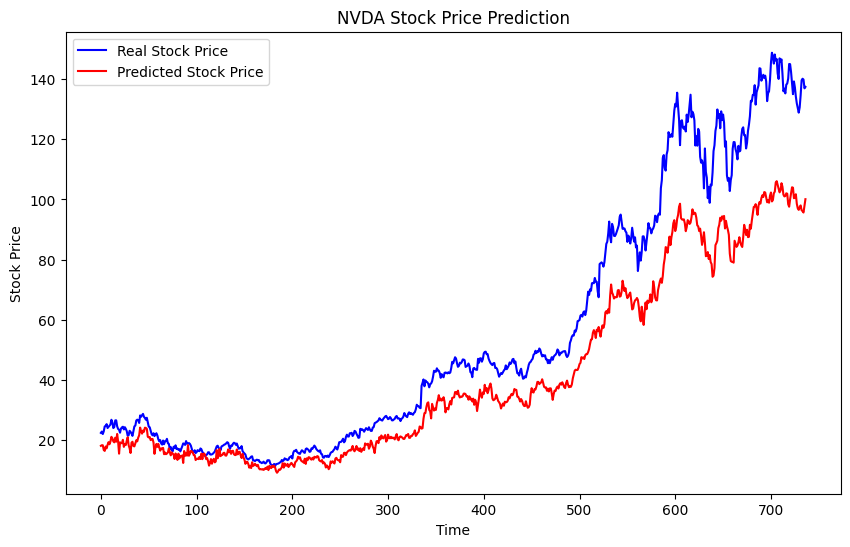

In [67]:
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Conclusion

This project showed how an RNN can be used for stock forecasting (with yfinance) and how different parameters affect prediction quality. Tuning the model was the real challenge in this project. 

In practice, this kind of projects can be useful for short-term forecasting or trend monitoring, but stock prices remain difficult to predict due to noise and volatility. RNNs work better for short-term forecasts, while LSTMs are generally more reliable for long-term forecasting because their model structure, allows to remember long patterns.

### Optimization ideas:
1) Test different date lengths to see whether the model predicts better
2) Increase time_step value, depending if the model should do a long-term or short-term forecasting. The higher the value, the more it is fitting for long-term forecasts
3) Increase the units of the RNN neural sructure, depending on the date length of the dataset
4) Increase epochs or add a small dropout rate  for the model training to reduce overfitting